In [1]:
import os
import math
import dill
from itertools import permutations

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import HuberRegressor as hubreg

import suite2p as s2p

import TwoPUtils
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u

ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
figdir = "/mnt/BigDisk/YMazeResults/behavior/"
os.makedirs(figdir,exist_ok=True)

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.2653088109204382
0.2646737117545143
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.29210682533837934
0.24274456286502788
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.16120403292401217
0.15775169184495644
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
0.22190869368073324
0.1995114753681196
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
0.08180194357319635
0.09011578353006452
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
0.29683750939242165
0.2896697587240808
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}
0.3024125964919737
0.27085709722621465
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': -1, 'ravel_ind': 0}
0.2571531134939734
0.2617434044596282
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel_arm': 1, 'ravel_ind': 1}
0.2840871526301206
0.23581529723524322
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'r

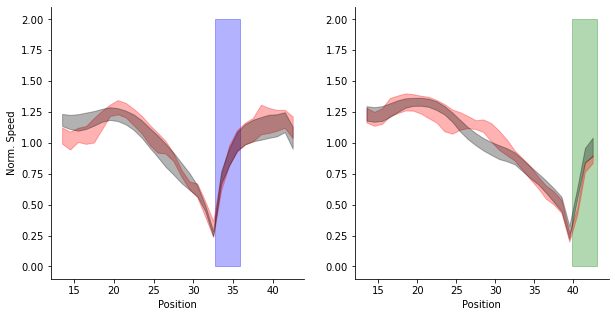

In [3]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,2], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,2],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_speed_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.2699381600994591
0.3053307323276945
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.3006635829237544
0.3012527991605213
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.16749304408268365
0.1656972940810901
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
0.2881022626202569
0.25211019712249944
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
0.17262725278145863
0.1608108302176963
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.27719416620413906
0.2867580936230472
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
0.40236628132748575
0.3617971282481997
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
0.34818199795783344
0.39241209594942233
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
0.2968304874191433
0.27337345448853134
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ra

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


0.3360631438312444
0.36212438500534355


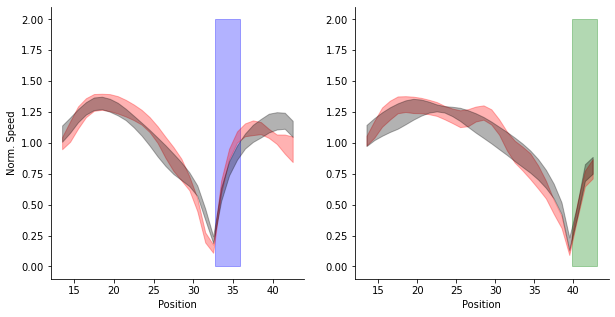

In [4]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {-1:[],1:[]}
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        ko_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='red', alpha = .3)

ctrl_mu = {-1:[],1:[]}
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        print(run_mean)
        mu, sem = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0), sp.stats.sem(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0, nan_policy='omit')
        ctrl_mu[lr].append(mu)
#         ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'], mu-sem, mu+sem, color='red', alpha = .3)
for ax_ind, lr in enumerate([-1,1]):
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(sess.trial_matrices['bin_centers'],mu- sem, mu+sem,color='black', alpha = .3)
    
    
ax[1].fill_betweenx([0,2], sess.rzone_late['tfront'], sess.rzone_late['tback'],zorder=0, color='green',alpha=.3)
ax[0].fill_betweenx([0,2],sess.rzone_early['tfront'], sess.rzone_early['tback'],zorder=0, color='blue',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'LR_norm_speed_day6.pdf'))

{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6, 'scan': 14, 'novel_arm': -1, 'ravel_ind': 1}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/28_09_2020/YMaze_LNovel/YMaze_LNovel_006_014.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/28_09_2020/YMaze_LNovel/YMaze_LNovel_003_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/28_09_2020/YMaze_LNovel/YMaze_LNovel_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': -1, 'ravel_ind': 0}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2, 'scan': 18, 'novel_arm': 1, 'ravel_ind': 1}
{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': -1, 'ravel_ind': 0}


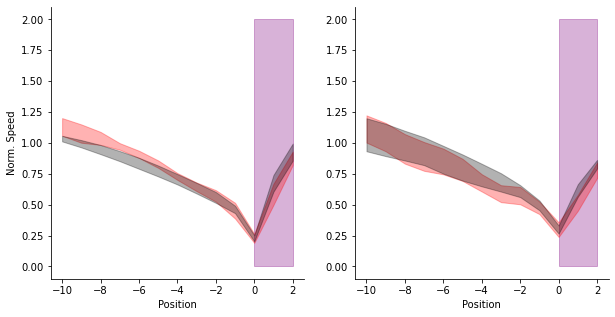

In [5]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
        
        
        
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=0)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,2], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,2],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_speed_day1.pdf'))

{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 6}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 8, 'novel_arm': 1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 6, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/03_10_2020/YMaze_LNovel/YMaze_LNovel_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 4, 'novel_arm': 1, 'ravel_ind': 5}
{'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 5, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 6}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}
{'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': 1, 'ravel_ind': 7}
{'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 2, 'novel_arm': -1, 'ravel_ind': 5}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /media/mplitt/Backup Plus3/2P_Data/4467333.1/05_12_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


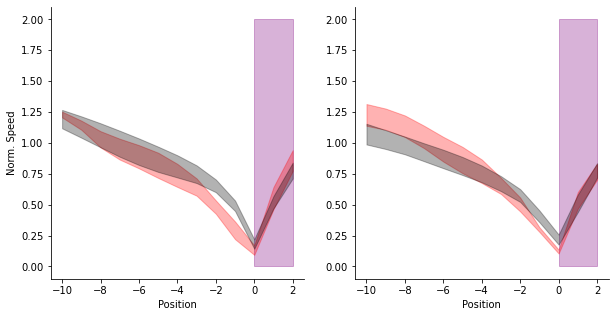

In [6]:
fig,ax = plt.subplots(1,2, figsize = [10,5])

ko_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ko_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ko_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ko_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
            
ctrl_mu = {'fam':[],'nov':[]}
x = np.arange(-10,3)
for mouse in ctrl_mice:
    sess = u.load_single_day(mouse,day=5)
    bin_edges = sess.trial_matrices['bin_edges']
    run_mean = np.nanmean(sess.trial_matrices['speed'][:,:].ravel())
    for ax_ind, lr in enumerate([-1, 1]):
        trial_mask = sess.trial_info['LR']== lr
#         run_mean = np.nanmean(sess.trial_matrices['speed'][trial_mask,:].ravel())
        
        
        mu = np.nanmean(sess.trial_matrices['speed'][trial_mask,:]/run_mean, axis=0)
        
        if sess.novel_arm ==-1:
            
            fam_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]

        elif sess.novel_arm == 1:
            fam_rzone_front = np.argwhere((sess.rzone_early['tfront']<=bin_edges[1:])*(sess.rzone_early['tfront']>=bin_edges[:-1]))[0][0]
            nov_rzone_front = np.argwhere((sess.rzone_late['tfront']<=bin_edges[1:])*(sess.rzone_late['tfront']>=bin_edges[:-1]))[0][0]
        
        if lr == sess.novel_arm:
            ctrl_mu['nov'].append(mu[nov_rzone_front-10:nov_rzone_front+3])
        else:
            ctrl_mu['fam'].append(mu[fam_rzone_front-10:fam_rzone_front+3])
        
    


for ax_ind, lr in enumerate(['fam', 'nov']):
    arr = np.array(ko_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='red', alpha = .3)
    
    arr = np.array(ctrl_mu[lr])
    mu, sem = np.nanmean(arr,axis=0), sp.stats.sem(arr, axis=0, nan_policy='omit')
    ax[ax_ind].fill_between(x, mu- sem, mu+sem,color='black', alpha = .3)
#     ax[ax_ind].plot(x, np.array(ko_mu[lr]).T,color='red', alpha = .3)


    
ax[0].fill_betweenx([0,2], 0, 2, zorder=0, color='purple',alpha=.3)
ax[1].fill_betweenx([0,2],0, 2, zorder=0, color='purple',alpha=.3)

ax[0].set_xlabel('Position')
ax[1].set_xlabel('Position')
ax[0].set_ylabel('Norm. Speed')
ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.savefig(os.path.join(figdir, 'famnov_norm_speed_day6.pdf'))

In [7]:
# reversal lick rates
def reversal_speedmat(mice, date_inds = [6,7,8]):
    l_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    r_lickmat = np.zeros([len(mice), 60, 30])*np.nan
    
    b_l = np.zeros([len(mice),1,1])
    b_r = np.zeros([len(mice),1,1])
    
    for i, mouse in enumerate(mice):
        concat_sess = u.single_mouse_concat_sessions(mouse, date_inds = [6,7,])
        
        b_mask = (concat_sess.trial_info['block_number']<2) * (concat_sess.trial_info['sess_num']==6)
        b_l_mask, b_r_mask = (b_mask * (concat_sess.trial_info['LR']==-1)), (b_mask*(concat_sess.trial_info['LR']==1))
    
        rev_mask = ((concat_sess.trial_info['block_number']>=2)*(concat_sess.trial_info['sess_num']==6) + (concat_sess.trial_info['sess_num']==7) + \
              (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2))>0

        l_rev_mask = rev_mask * (concat_sess.trial_info['LR']==-1)
        r_rev_mask = rev_mask * (concat_sess.trial_info['LR']==1)
        
        tmp_l = concat_sess.trial_matrices['speed'][l_rev_mask,:]
        max_trial = np.minimum(60, tmp_l.shape[0])
        print(max_trial)
        l_lickmat[i,:max_trial,:] = tmp_l[:max_trial,:]
        
        tmp_r = concat_sess.trial_matrices['speed'][r_rev_mask,:]
        max_trial = np.minimum(60, tmp_r.shape[0])
        print(max_trial)
        r_lickmat[i,:max_trial,:] = tmp_r[:max_trial,:]
        
        b_l[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['speed'][b_l_mask,:],axis=0))
        b_r[i] = np.nanmean(np.nanmean(concat_sess.trial_matrices['speed'][b_r_mask,:], axis=0))
        
    return l_lickmat/b_l, r_lickmat/b_r

In [8]:
ko_l_speedmat, ko_r_speedmat = reversal_speedmat(ko_mice)
ctrl_l_speedmat, ctrl_r_speedmat = reversal_speedmat(ctrl_mice)

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.1/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
51
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
60
60
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal


-1.0118837707229984 0.34121594913618547
0.3248766634471747 0.753607281517613
0.49366942192912133 0.6348063488234674
0.681826365536196 0.5145997023062591
0.38049585203514047 0.7134815245626587
0.1731896923996884 0.8668041019971434


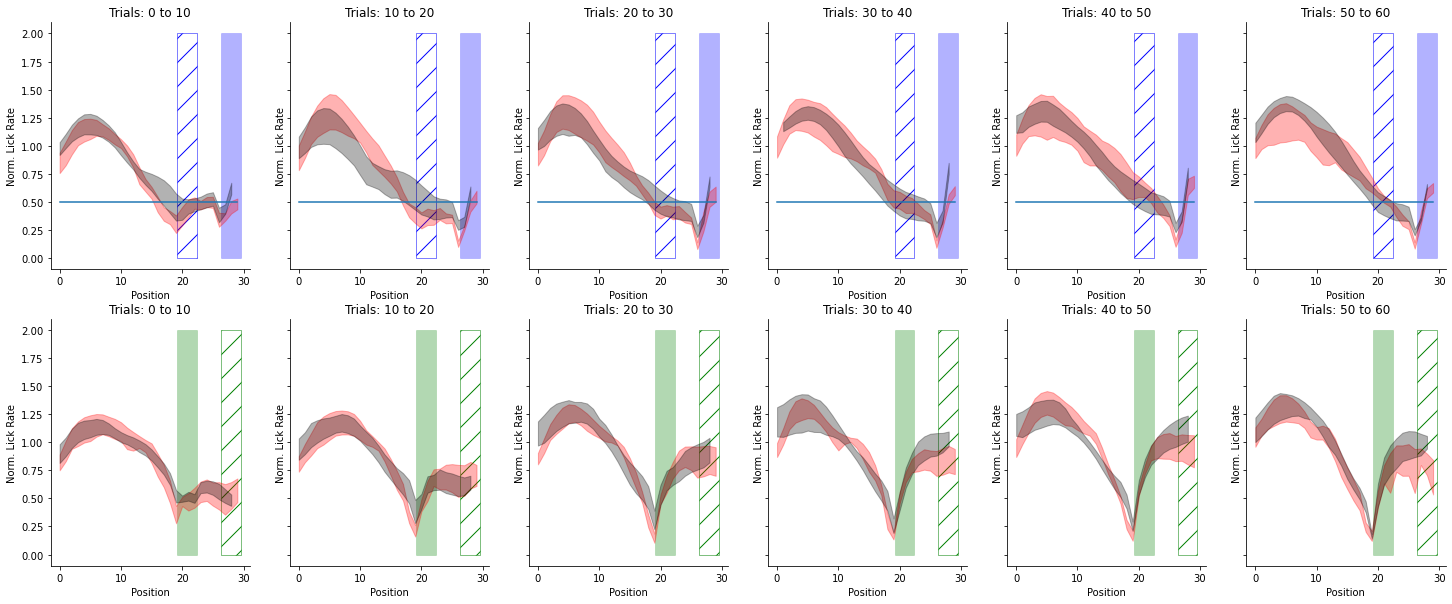

In [12]:
fig,ax = plt.subplots(2,6, figsize= [25,10], sharey=True)
for i,start in enumerate(range(0,60,10)):
    
    ax[0,i].fill_betweenx([0,2], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='blue',linewidth=0.5)
    ax[0,i].fill_betweenx([0,2], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="blue",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_l_speedmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_l_speedmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[0,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    ax[0,i].plot(np.arange(30), .5*np.ones([30,]))
    
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['t_antic'])*(t_early_bins<=sess.rzone_early['tfront'])
    _ko = np.nanmean(np.nanmean(ko_l_speedmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    _ctrl = np.nanmean(np.nanmean(ctrl_l_speedmat[:,start:start+10,:],axis=1)[:,rzone_early],axis=1)
    t,p = sp.stats.ttest_ind(_ko,_ctrl)
    print(t,p)
    
    
    ax[1,i].fill_betweenx([0,2], sess.rzone_late['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_late['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="none",alpha=1, hatch='/', edgecolor='green',linewidth=0.5)
    ax[1,i].fill_betweenx([0,2], sess.rzone_early['tfront']-sess.trial_matrices['bin_centers'][0], 
                          sess.rzone_early['tback']-sess.trial_matrices['bin_centers'][0], 
                          color="green",alpha=.3, linewidth=0.5)
    
    mu, sem = np.nanmean(np.nanmean(ko_r_speedmat[:,start:start+10,:],axis=1),axis=0), sp.stats.sem(np.nanmean(ko_r_speedmat[:,start:start+10,:], axis=1),axis=0)
#     ax[i].plot(ko_l_lickmat[:,start:start+10,:].mean(axis=1).T)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='red', alpha=.3)
    
    mu, sem = ctrl_r_speedmat[:,start:start+10,:].mean(axis=1).mean(axis=0), sp.stats.sem(ctrl_r_speedmat[:,start:start+10,:].mean(axis=1),axis=0)
    ax[1,i].fill_between(np.arange(30), mu-sem, mu+sem, color='black', alpha=.3)
    
    for r in [0,1]:
        ax[r,i].spines['top'].set_visible(False)
        ax[r,i].spines['right'].set_visible(False)
        
        ax[r,i].set_xlabel('Position')
        ax[r,i].set_ylabel('Norm. Lick Rate')
        ax[r,i].set_title("Trials: %d to %d" % (start, start+10))
fig.savefig(os.path.join(figdir, 'reversal_speed.pdf'))

In [13]:
def get_early_speed(sess):
    t_early_bins = sess.trial_matrices['bin_edges'][1:]
    rzone_early = (t_early_bins>=sess.rzone_early['tfront']-5)*(t_early_bins<=sess.rzone_early['tfront']+1)
    baseline_mask = (sess.trial_info['sess_num']==6)*(sess.trial_info['LR']==-1)*(sess.trial_info['block_number']<2)
    ret_mask = (sess.trial_info['sess_num']==8)*(sess.trial_info['block_number']>1)
    rev_mask = (~baseline_mask)*(sess.trial_info['LR']==-1)*(~ret_mask)
    
    lr_early = sess.trial_matrices['speed'][:, rzone_early].mean(axis=1)
    lr_b = lr_early[baseline_mask].mean()
    lr_rev = lr_early[rev_mask]
    return lr_rev/lr_b
    

# def get_early_lick_slope(sess):
#     lr_rev = get_early_licks(sess)
#     max_trial = np.minimum(lr_rev.shape[0],40)
#     x = np.arange(max_trial)
#     res = sp.stats.linregress(x,lr_rev[:max_trial])
#     return res.slope



In [14]:
ko_lr_rev = [get_early_speed(u.single_mouse_concat_sessions(mouse, date_inds=[6,7, 8])) for mouse in ko_mice if mouse not in ['4467975.1']]
ctrl_lr_rev = [get_early_speed(u.single_mouse_concat_sessions(mouse, date_inds=[6,7, 8])) for mouse in ctrl_mice]

/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s

06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_006.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_004.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.3/06_10_2020/YMaze_LNovel/YMaze_LNovel_001_008.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_RewardReversal
06_10_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_LNovel
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal


152


<ipython-input-17-55d3f723a5db>:42: RuntimeWarning: Mean of empty slice
  mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')


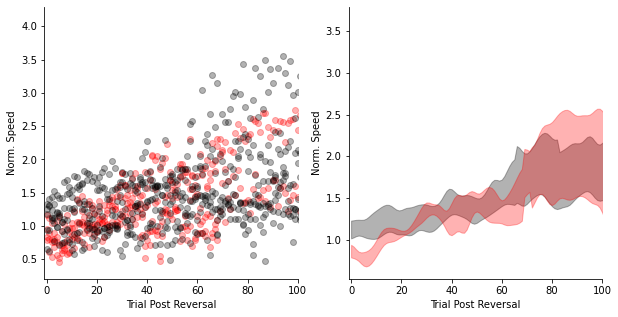

In [17]:
fig, ax = plt.subplots(1,2,figsize=[10,5])

max_x = 0

for lr in ko_lr_rev:    
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='red', alpha=.3)
    
for lr in ctrl_lr_rev:
    x = np.arange(0,lr.shape[0])
    max_x = np.maximum(lr.shape[0],max_x)
    ax[0].scatter(x,lr,color='black',alpha=.3)

print(max_x)
ko_lr_arr = np.zeros([len(ko_lr_rev), max_x])*np.nan
ctrl_lr_arr = np.zeros([len(ctrl_lr_rev), max_x])*np.nan
for i, lr in enumerate(ko_lr_rev):
    n = lr.shape[0]
    ko_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
for i, lr in enumerate(ctrl_lr_rev):
    n = lr.shape[0]
    ctrl_lr_arr[i,:n] = sp.ndimage.filters.gaussian_filter1d(lr,2)
    
# trials = np.arange(0,80)
# y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
# ax[0].plot(trials, y, color = 'black',linewidth=5)
# trials = np.arange(0,40)
# y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
# ax[0].plot(trials,y, color='red',linewidth=5)





    
x = np.arange(0, max_x)
mu,sem = np.nanmean(ctrl_lr_arr,axis=0), sp.stats.sem(ctrl_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='black', alpha= .3)

mu,sem = np.nanmean(ko_lr_arr,axis=0), sp.stats.sem(ko_lr_arr, axis=0, nan_policy='omit')
ax[1].fill_between(x, mu+sem,mu-sem, color='red', alpha= .3)

for r in range(2):
    ax[r].set_xlim([-1,100])
    ax[r].spines['top'].set_visible(False)
    ax[r].spines['right'].set_visible(False)
    ax[r].set_xlabel('Trial Post Reversal')
    ax[r].set_ylabel('Norm. Speed')
    
fig.savefig(os.path.join(figdir, 'reversal_early_speed.pdf'))